# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．  

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [ ]:
### 初回のみ実行
!wget https://nlp100.github.io/data/neko.txt
!apt install mecab libmecab-dev mecab-ipadic-utf8
!mecab -o ./neko.txt.mecab ./neko.txt
!pip install japanize-matplotlib

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
file_path = 'neko.txt.mecab'

sentences = []
morphs = []
with open(file_path, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
        continue
      else:
        attr =  fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        morphs.append(morph)
    else:  # 文末：形態素リストを文リストに追加
      sentences.append(morphs)
      morphs = []

# 確認用
for line in sentences[5]:
  print(line)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos': '副詞', 'pos1': '一般'}
{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [3]:
verb = set()
for sentence in sentences:
  for line in sentence:
    if line['pos'] == '動詞':
      verb.add(line['surface'])

print('動詞の種類：', len(verb))
for ve in list(verb)[:10]:
  print(ve)

動詞の種類： 3893
かすん
直ら
どく
泣く
隣り
呑み込む
乱す
纏める
取り掛る
喰っ


## 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [4]:
based_verb = set()
for sentence in sentences:
  for line in sentence:
    if line['pos'] == '動詞':
      based_verb.add(line['base'])

print('動詞の原形の種類：', len(based_verb))
for bv in list(based_verb)[:10]:
  print(bv)

動詞の原形の種類： 2300
どく
泣く
呑み込む
平らげる
乱す
伏す
纏める
取り掛る
すかす
探る


## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
nouns = set()
for sentence in sentences:
  for index, line in enumerate(sentence):
    if index+2 < len(sentence):
      if line['pos'] == '名詞' and sentence[index+2]['pos'] == '名詞':
        if sentence[index+1]['surface'] == 'の':
          nouns.add(line['surface'] + 'の' + sentence[index+2]['surface'])
print('名詞句の種類：', len(nouns))
for noun in list(nouns)[:10]:
  print(noun)

名詞句の種類： 4924
彼の考
説のよう
リーシャスの援
退屈のあまり
主人の愚
健全の人間
様のよう
自分の姓名
二の真理
正義のため


## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [6]:
nouns_set = set()
for sentence in sentences:
  nouns_map = {'num': 0, 'str': ''}
  for index, line in enumerate(sentence):
    if line['pos'] == '名詞':
      nouns_map['num'] = nouns_map['num'] + 1
      nouns_map['str'] = nouns_map['str'] + line['surface']
    else:
      if nouns_map['str'] != '' and 1 < nouns_map['num']:
        nouns_set.add(nouns_map['str'])
      else:
        nouns_map['str'] = ''
      nouns_map['num'] = 0
print('名詞句の種類：', len(nouns_set))
for noun in list(nouns_set)[:10]:
  print(noun)

名詞句の種類： 4682
入国以来三百年
みんな感心
産婆営業勝手
日本国帝都
——一
落雲館
晩帰り
名人理学士水島寒月
芸術趣味
もっとも集


## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [7]:
import pandas as pd
import numpy as np

word_list = []
for sentence in sentences:
  for line in sentence:
    if line['pos'] != '記号':
      if line['surface'] != 0:
        word_list.append(line['base'])
word_df = pd.DataFrame({'word': word_list})

word_df['word'].value_counts().head(10)

の     9194
て     6848
は     6420
に     6243
を     6071
だ     5972
と     5508
が     5337
た     4267
する    3657
Name: word, dtype: int64

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


<BarContainer object of 10 artists>

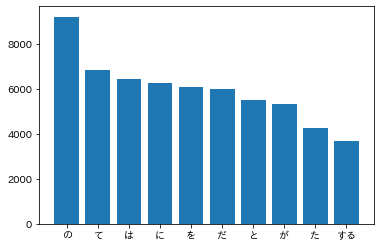

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib 

top_10_word = word_df['word'].value_counts().head(10)
top_10_word_list = list(top_10_word.index)
top_10_word_count_list = list(top_10_word)

plt.bar(top_10_word_list, top_10_word_count_list)

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

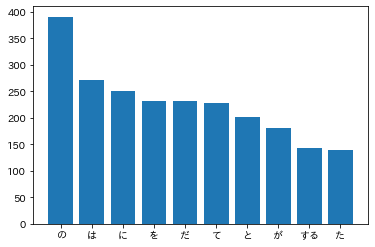

In [9]:
co_occu_list = []
for sentence in sentences:
  temp_list = []
  for line in sentence:
    if line['pos'] != '記号':
      if line['surface'] != 0:
        temp_list.append(line['base'])
  if '猫' in temp_list:
    for wd in temp_list:
      if '猫' not in wd:
        co_occu_list.append(wd)
co_occu_df = pd.DataFrame({'frequency': co_occu_list})
co_occu_freq = co_occu_df['frequency'].value_counts().head(10)
co_occu_freq_index = list(co_occu_freq.index)

plt.bar(co_occu_freq_index, list(co_occu_freq))

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([4.707e+03, 1.901e+03, 9.570e+02, 6.020e+02, 4.590e+02, 3.230e+02,
        2.410e+02, 2.060e+02, 1.590e+02, 1.250e+02, 1.200e+02, 1.190e+02,
        8.300e+01, 9.600e+01, 7.400e+01, 5.200e+01, 4.900e+01, 5.700e+01,
        4.600e+01, 4.300e+01, 3.000e+01, 2.900e+01, 3.100e+01, 3.400e+01,
        2.100e+01, 1.800e+01, 2.500e+01, 1.900e+01, 2.200e+01, 2.200e+01,
        1.200e+01, 1.600e+01, 1.300e+01, 1.300e+01, 1.900e+01, 1.700e+01,
        8.000e+00, 1.400e+01, 1.000e+01, 1.300e+01, 1.500e+01, 1.000e+01,
        7.000e+00, 9.000e+00, 1.100e+01, 9.000e+00, 8.000e+00, 8.000e+00,
        4.000e+00, 6.000e+00, 8.000e+00, 6.000e+00, 3.000e+00, 2.000e+00,
        6.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 6.000e+00, 6.000e+00,
        2.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        7.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 1.000e+0

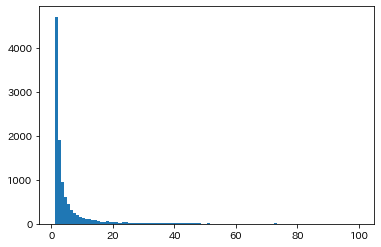

In [20]:
plt.hist(list(word_df['word'].value_counts()), bins=100, range=(1,100))

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

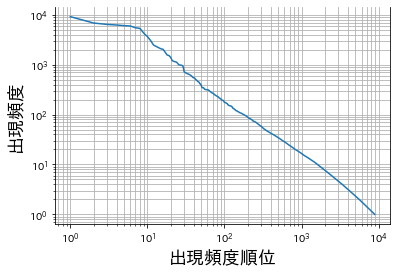

In [30]:
from scipy.stats import rankdata

freq_ranking = rankdata(-np.array(list(word_df['word'].value_counts())))
freq_ranking = list(dict.fromkeys(freq_ranking))
freq_word = list(dict.fromkeys(word_df['word'].value_counts()))

plt.plot(freq_ranking, freq_word)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('出現頻度順位',fontsize=18)
plt.ylabel('出現頻度',fontsize=18)
plt.grid(which="both")

plt.show()